In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def threshold_image(im, th):
    threshold_im = np.zeros(im.shape)
    threshold_im[im >= th] = 1
    return threshold_im

def compute_otsu_criteria(im, th):
    thresholded_im = threshold_image(im, th)
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1
    if weight1 == 0 or weight0 == 0:
        return np.inf
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    return weight0 * var0 + weight1 * var1

def fitness_function(im, th):
    return compute_otsu_criteria(im, th)

def initialize_population(population_size, im):
    population = np.random.randint(low=0, high=np.max(im)+1, size=population_size)
    return population

def employed_bee_phase(population, im, fitness_function):
    new_population = []
    for i in range(len(population)):
        neighbor = np.random.randint(low=0, high=np.max(im)+1)
        fitness_current = fitness_function(im, population[i])
        fitness_neighbor = fitness_function(im, neighbor)
        if fitness_neighbor < fitness_current:
            new_population.append(neighbor)
        else:
            new_population.append(population[i])
    return new_population

def onlooker_bee_phase(population, im, fitness_function):
    probabilities = [1 / (1 + fitness_function(im, th)) for th in population]
    probabilities /= np.sum(probabilities)
    new_population = []
    for i in range(len(population)):
        neighbor = np.random.randint(low=0, high=np.max(im)+1)
        fitness_current = fitness_function(im, population[i])
        fitness_neighbor = fitness_function(im, neighbor)
        if fitness_neighbor < fitness_current:
            new_population.append(neighbor)
        else:
            new_population.append(np.random.choice(population, p=probabilities))
    return new_population

def scout_bee_phase(population, im):
    new_population = []
    for th in population:
        if np.random.random() < 0.1:  # 10% chance of being a scout bee
            new_population.append(np.random.randint(low=0, high=np.max(im)+1))
        else:
            new_population.append(th)
    return new_population

def artificial_bee_colony(im, population_size, max_iterations):
    population = initialize_population(population_size, im)
    best_threshold = np.argmin([fitness_function(im, th) for th in population])
    fitness_values = []
    threshold_values = []
    for iteration in range(max_iterations):
        population = employed_bee_phase(population, im, fitness_function)
        population = onlooker_bee_phase(population, im, fitness_function)
        population = scout_bee_phase(population, im)
        current_best_threshold = np.argmin([fitness_function(im, th) for th in population])
        current_best_fitness = fitness_function(im, current_best_threshold)
        if current_best_fitness < fitness_function(im, best_threshold):
            best_threshold = current_best_threshold
        fitness_values.append(current_best_fitness)
        threshold_values.append(current_best_threshold)
    return best_threshold, fitness_values, threshold_values

In [3]:
path = "image_color.jpg"
im = np.asarray(Image.open(path).convert('L'))  # L for grayscale
population_size = 50
max_iterations = 100
best_threshold, fitness_values, threshold_values = artificial_bee_colony(im, population_size, max_iterations)
im_otsu = threshold_image(im, best_threshold)

print("Image size = {}".format(im.shape))
print("Best threshold = {}".format(best_threshold))

Image size = (1080, 1920)
Best threshold = 46


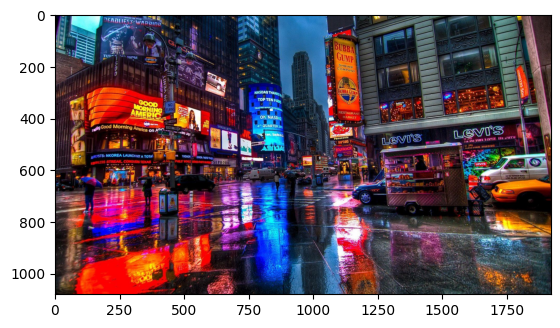

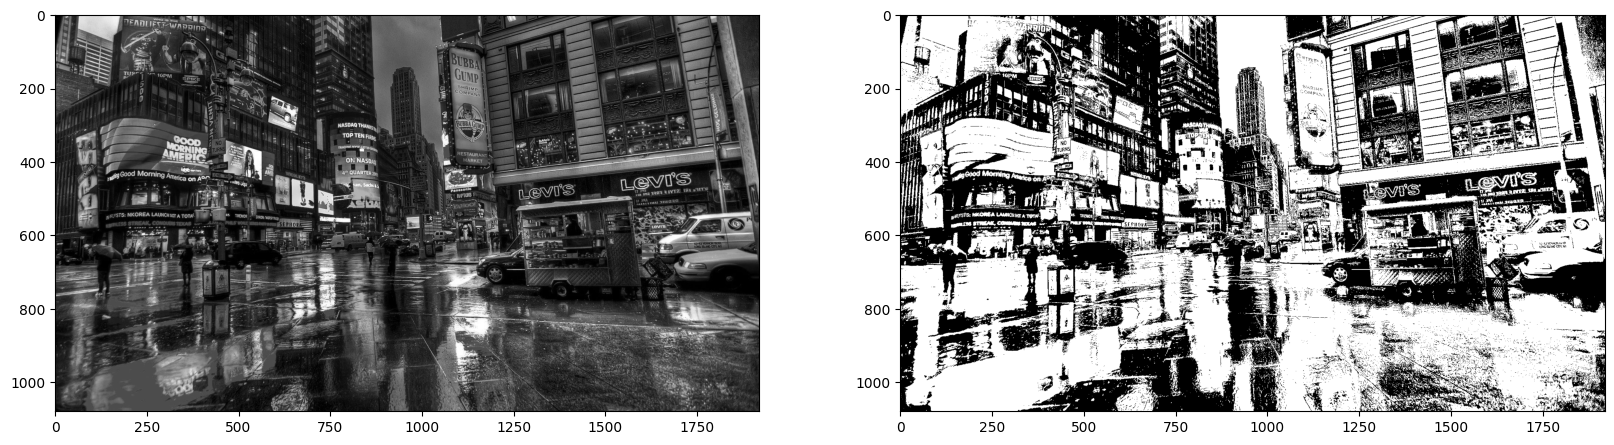

In [4]:
image = mpimg.imread(path)
plt.imshow(image)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(im_otsu, cmap='gray')

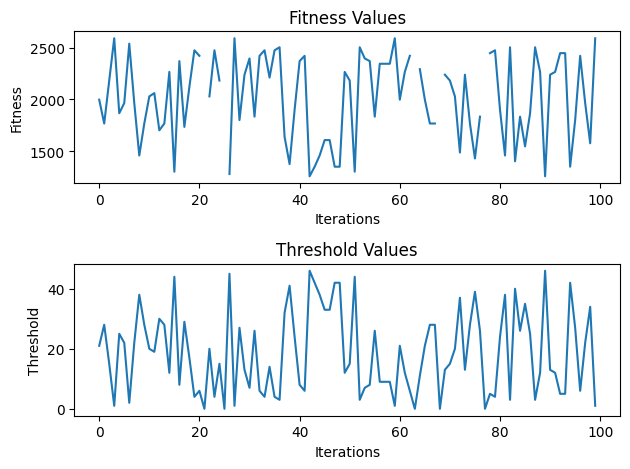

In [5]:
# Plot fitness and threshold values
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(range(max_iterations), fitness_values)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness Values')

plt.subplot(2, 1, 2)
plt.plot(range(max_iterations), threshold_values)
plt.xlabel('Iterations')
plt.ylabel('Threshold')
plt.title('Threshold Values')

plt.tight_layout()
plt.show()